In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

In [2]:
def DFT(s, window='No window', sigma=100.):
    s = np.asarray(s, dtype=float)
    N = s.shape[0]

    if window == 'No window':
        w = np.ones(N, dtype=float)
    elif window == 'Bartlett':
        w = 1. - np.abs(np.arange(N, dtype=float) - N / 2.) / (N / 2.)
    elif window == 'Hann':
        w = 0.5 * (1. - np.cos(2. * np.pi * np.arange(N, dtype=float) / N))
    elif window == 'Welch':
        w = 1. - ((np.arange(N, dtype=float) - N / 2.) / (N / 2.))**2.
    elif window == 'Gauss':
        w = np.exp(-((np.arange(N, dtype=float) - N / 2.) / sigma)**2.)

    # Create a frequency vector
    k = np.arange(N)
    
    # Compute the weight matrix
    wn = np.exp(-1j * 2. * np.pi * np.outer(k, k) / N)

    # Apply the window to the input signal
    sw = w * s

    # Compute the DFT using matrix multiplication
    S = np.dot(wn, sw)

    # Power spectrum
    P = np.abs(S)**2
    
    return S, P


def iDFT(S):
    N = len(S)

    # Create a frequency vector
    k = np.arange(N)
    
    # Compute the weight matrix
    wn = np.exp(1j * 2. * np.pi * np.outer(k, k) / N)

    # Compute the iDFT using matrix multiplication
    s = np.dot(S, wn) / N

    return s


In [3]:
c0 = np.loadtxt('data/signal0.dat')
c1 = np.loadtxt('data/signal1.dat')
c2 = np.loadtxt('data/signal2.dat')
c3 = np.loadtxt('data/signal3.dat')

N = len(c0)

ts = np.arange(0, N, dtype=float)
dt = ts[1] - ts[0]

nuc = 1. / (2. * dt)
nus = np.linspace(-nuc, nuc, N)
dnu = nus[1]-nus[0]

In [4]:
tau = 16.
r = 1. / (2.*tau) * np.exp(-np.abs(ts)/(tau)) # Prenosna funkcija

for i in range(int(len(r)/2)):
    r[-i]=r[i]

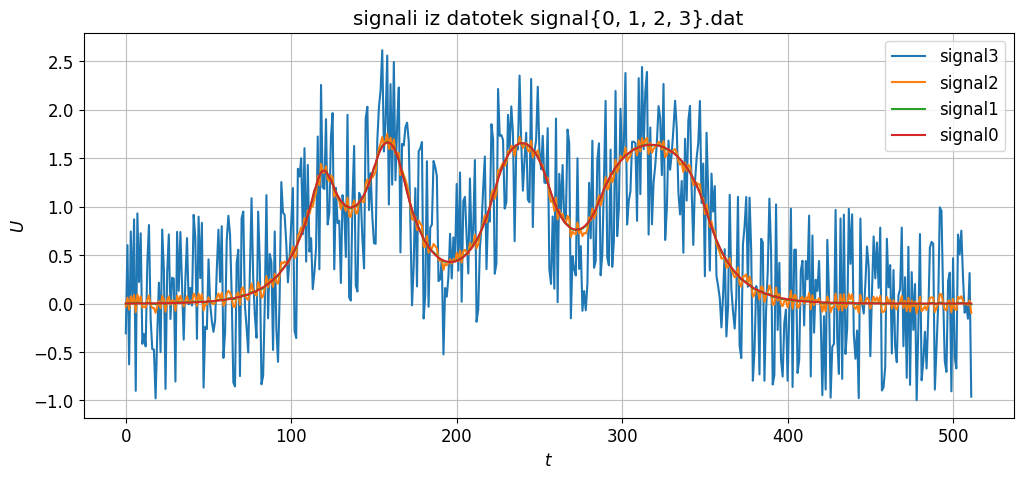

In [5]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_title('signali iz datotek signal{0, 1, 2, 3}.dat')
ax.set_ylabel(r'$U$')
ax.set_xlabel(r'$t$')
ax.plot(ts, c3, label='signal3')
ax.plot(ts, c2, label='signal2')
ax.plot(ts, c1, label='signal1')
ax.plot(ts, c0, label='signal0')
ax.legend()
plt.show()

In [6]:
C0, P0 = DFT(c0)
C1, P1 = DFT(c1)
C2, P2 = DFT(c2)
C3, P3 = DFT(c3)

R, Pr = DFT(r)

In [7]:
u0 = iDFT(C0/R)

c:\Users\Tadej\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Tadej\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


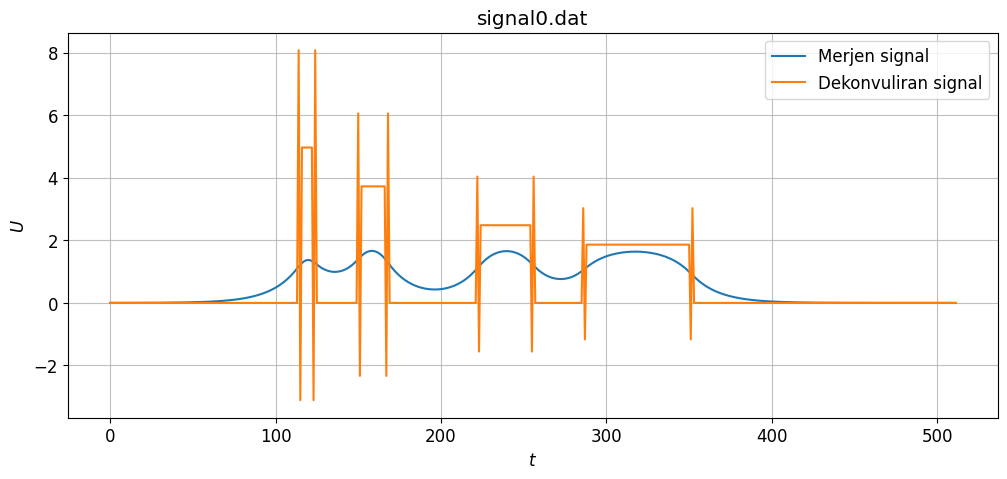

In [8]:
# Prikaz signala in dekonvuliranega signala

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(1, 1, 1)
ax.grid(alpha=0.8)
ax.set_title('signal0.dat')
ax.set_ylabel(r'$U$')
ax.set_xlabel(r'$t$')
ax.plot(ts, c0, label='Merjen signal')
ax.plot(ts, u0, label='Dekonvuliran signal')
ax.legend()

- skupaj s filtrom

In [9]:
def exponent(t, A, b):
    return A*np.exp(-b*t)

In [10]:
print(ts[[8, 40, 41]])

[ 8. 40. 41.]


In [11]:
# signal0.dat

meja0 = 70
N0 = np.ones_like(P0)*np.average(P0[meja0:int(len(P0)/2)])
S0 = exponent(ts, 11000, 0.40)
phi0 = S0**2/(S0**2 + N0**2)

for i in range(int(len(S0)/2)):
    S0[-i]=S0[i]
    phi0[-i]=phi0[i]

u0 = iDFT(C0*phi0/R)

meja1 = 50
N1 = np.ones_like(P1)*np.average(P1[meja1:int(len(P1)/2)])
S1 = exponent(ts, 11000, 0.40)
phi1 = S1**2/(S1**2 + N1**2)

for i in range(int(len(S1)/2)):
    S1[-i]=S1[i]
    phi1[-i]=phi1[i]

u1 = iDFT(C1*phi1/R)

meja2 = 40
N2 = np.ones_like(P2)*np.average(P2[meja2:int(len(P2)/2)])
S2 = exponent(ts, 11000, 0.40)
phi2 = S2**2/(S2**2 + N2**2)

for i in range(int(len(S2)/2)):
    S2[-i]=S2[i]
    phi2[-i]=phi2[i]

u2 = iDFT(C2*phi2/R)

meja3 = 40
N3 = np.ones_like(P3)*np.average(P3[meja3:int(len(P3)/2)])
S3 = exponent(ts, 11000, 0.40)
phi3 = S3**2/(S3**2 + N3**2)

for i in range(int(len(S3)/2)):
    S3[-i]=S3[i]
    phi3[-i]=phi3[i]

u3 = iDFT(C3*phi3/R)

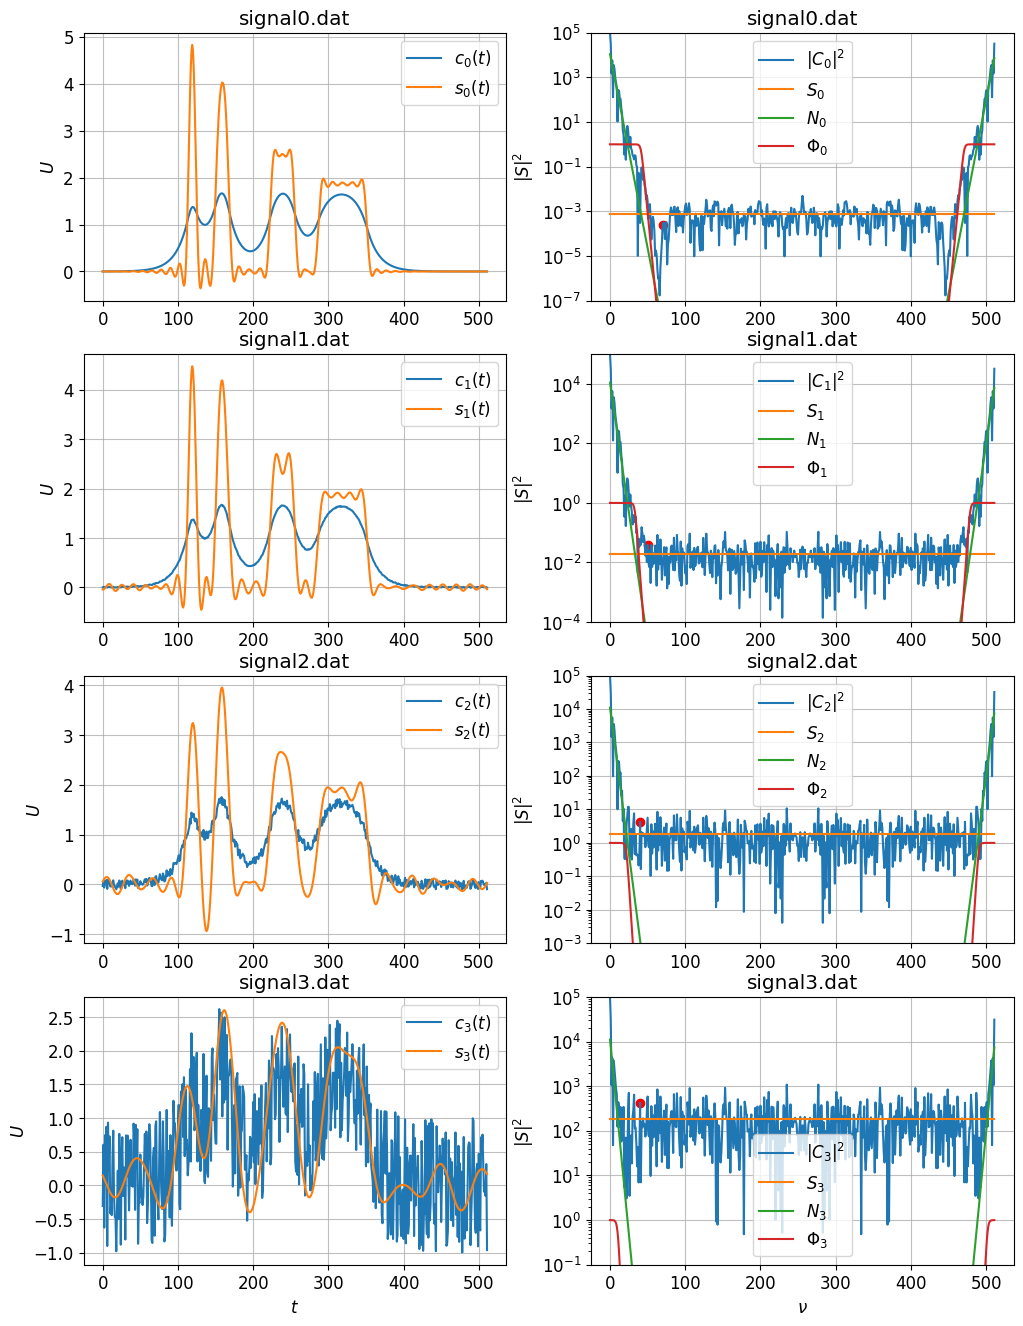

In [12]:
fig = plt.figure(figsize=(12, 16))

ax = fig.add_subplot(4, 2, 1)
ax.grid(alpha=0.8)
ax.set_title('signal0.dat')
ax.set_ylabel(r'$U$')
ax.plot(ts, c0, label=r'$c_0(t)$')
ax.plot(ts, u0, label=r'$s_0(t)$')
ax.legend()

ax = fig.add_subplot(4, 2, 2)
ax.grid(alpha=0.8)
ax.set_title('signal0.dat')
ax.set_yscale('log')
ax.set_ylabel(r'$|S|^2$')
ax.plot(ts, P0, label=r'$|C_0|^2$')
ax.plot(ts, N0, label=r'$S_0$')
ax.plot(ts, S0, label=r'$N_0$')
ax.plot(ts, phi0, label=r'$\Phi_0$')
ax.set_ylim((10**(-7), 10**(5)))
ax.scatter(ts[meja0], P0[meja0], color='red')
ax.legend()


ax = fig.add_subplot(4, 2, 3)
ax.grid(alpha=0.8)
ax.set_title('signal1.dat')
ax.set_ylabel(r'$U$')
ax.plot(ts, c1, label=r'$c_1(t)$')
ax.plot(ts, u1, label=r'$s_1(t)$')
ax.legend()

ax = fig.add_subplot(4, 2, 4)
ax.grid(alpha=0.8)
ax.set_title('signal1.dat')
ax.set_yscale('log')
ax.set_ylabel(r'$|S|^2$')
ax.plot(ts, P1, label=r'$|C_1|^2$')
ax.plot(ts, N1, label=r'$S_1$')
ax.plot(ts, S1, label=r'$N_1$')
ax.plot(ts, phi1, label=r'$\Phi_1$')
ax.set_ylim((10**(-4), 10**(5)))
ax.scatter(ts[meja1], P1[meja1], color='red')
ax.legend()


ax = fig.add_subplot(4, 2, 5)
ax.grid(alpha=0.8)
ax.set_title('signal2.dat')
ax.set_ylabel(r'$U$')
ax.plot(ts, c2, label=r'$c_2(t)$')
ax.plot(ts, u2, label=r'$s_2(t)$')
ax.legend()

ax = fig.add_subplot(4, 2, 6)
ax.grid(alpha=0.8)
ax.set_title('signal2.dat')
ax.set_yscale('log')
ax.set_ylabel(r'$|S|^2$')
ax.plot(ts, P2, label=r'$|C_2|^2$')
ax.plot(ts, N2, label=r'$S_2$')
ax.plot(ts, S2, label=r'$N_2$')
ax.plot(ts, phi2, label=r'$\Phi_2$')
ax.set_ylim((10**(-3), 10**(5)))
ax.scatter(ts[meja2], P2[meja2], color='red')
ax.legend()


ax = fig.add_subplot(4, 2, 7)
ax.grid(alpha=0.8)
ax.set_title('signal3.dat')
ax.set_ylabel(r'$U$')
ax.set_xlabel(r'$t$')
ax.plot(ts, c3, label=r'$c_3(t)$')
ax.plot(ts, u3, label=r'$s_3(t)$')
ax.legend()

ax = fig.add_subplot(4, 2, 8)
ax.grid(alpha=0.8)
ax.set_title('signal3.dat')
ax.set_yscale('log')
ax.set_ylabel(r'$|S|^2$')
ax.set_xlabel(r'$\nu$')
ax.plot(ts, P3, label=r'$|C_3|^2$')
ax.plot(ts, N3, label=r'$S_3$')
ax.plot(ts, S3, label=r'$N_3$')
ax.plot(ts, phi3, label=r'$\Phi_3$')
ax.set_ylim((10**(-1), 10**(5)))
ax.scatter(ts[meja3], P3[meja3], color='red')
ax.legend()

plt.show()

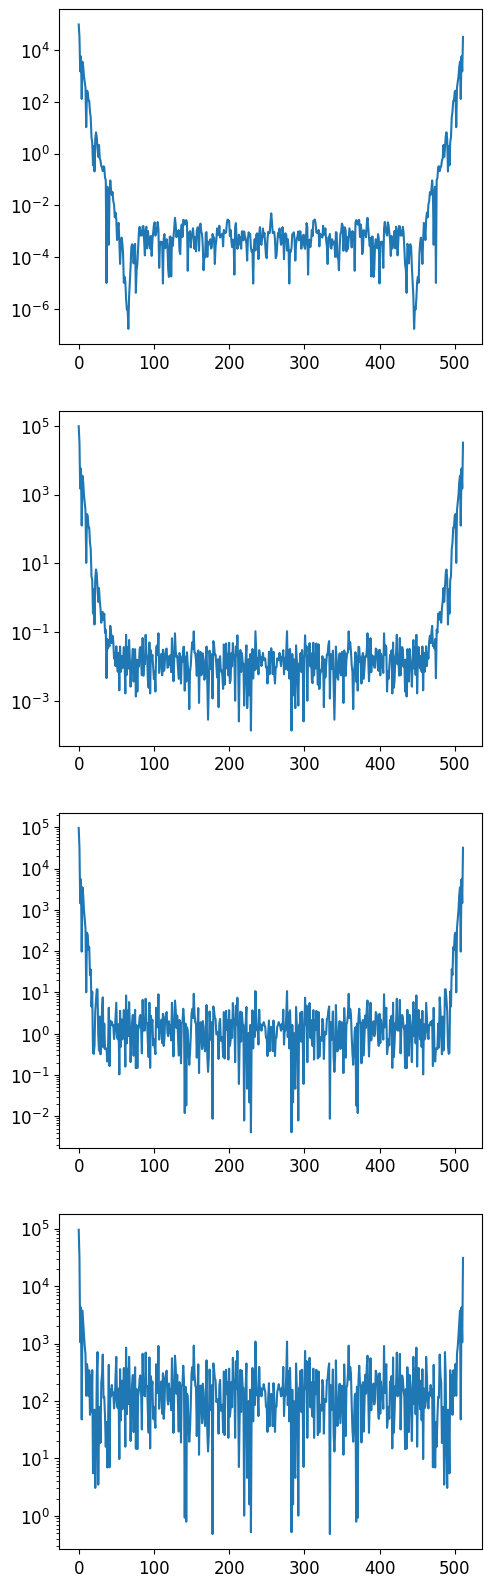

In [13]:
fig = plt.figure(figsize=(12, 20))

ax = fig.add_subplot(4, 2, 2)
ax.set_yscale('log')
ax.plot(ts, P0)

ax = fig.add_subplot(4, 2, 4)
ax.set_yscale('log')
ax.plot(ts, P1)

ax = fig.add_subplot(4, 2, 6)
ax.set_yscale('log')
ax.plot(ts, P2)

ax = fig.add_subplot(4, 2, 8)
ax.set_yscale('log')
ax.plot(ts, P3)